In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load Dataset

Load dataset csv file into a data frame.

In [4]:
# TODO
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [112]:
print('feature names: ', df.columns)

feature names:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


target
1    526
0    499
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

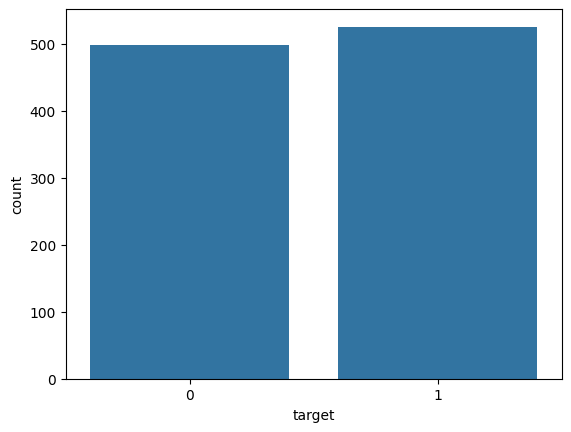

In [119]:
# TODO
print(df.target.value_counts())
sns.countplot(x="target", data=df)

In [120]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='thalach', ylabel='age'>

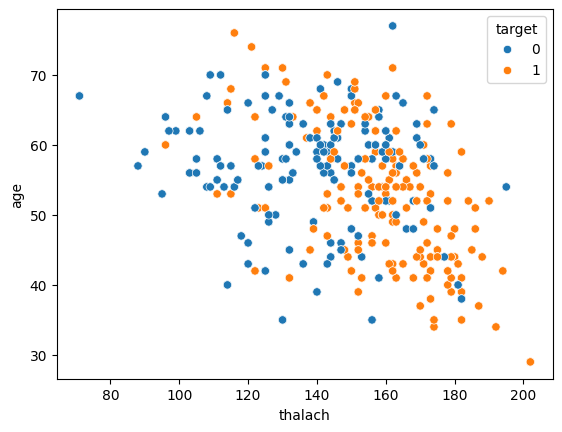

In [114]:
sns.scatterplot(data=df, x="thalach", y="age", hue="target")

In [115]:
from scipy import stats
stats.pearsonr(df["thalach"], df["age"])

PearsonRResult(statistic=-0.39022707503159293, pvalue=1.2738266772096955e-38)

These two features are statistically correlated with a strong p-value.

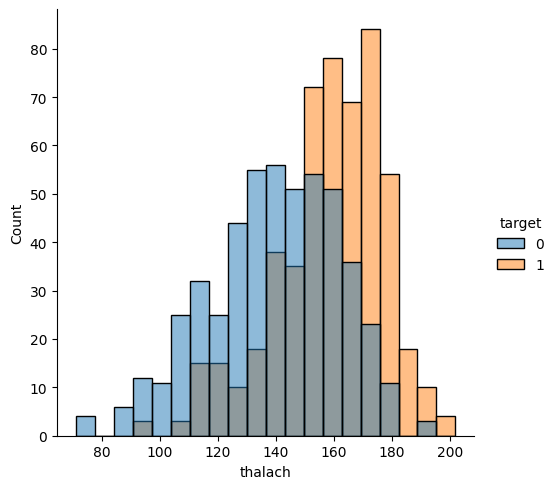

In [116]:
sns.displot(df, x="thalach", hue="target")

In [117]:
stats.pearsonr(df["thalach"], df["target"])

PearsonRResult(statistic=0.42289549648287084, pvalue=9.962970840354021e-46)

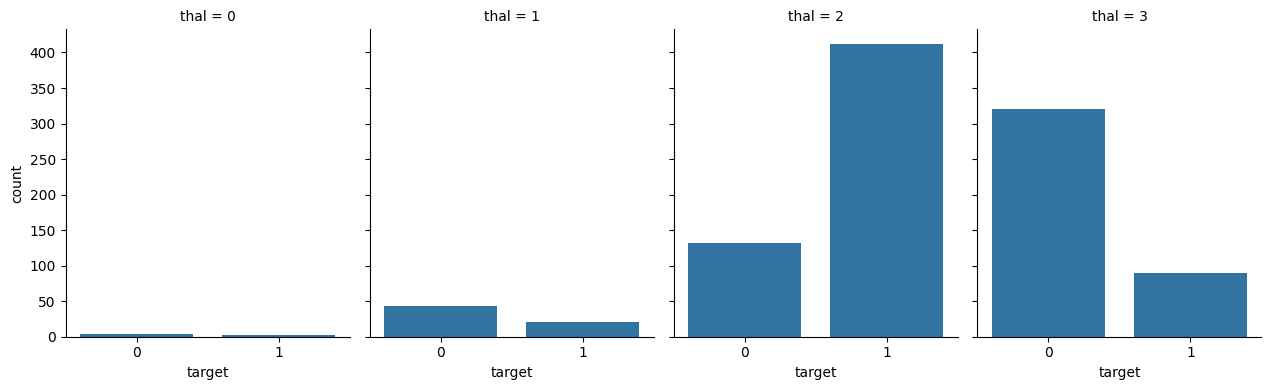

In [118]:
sns.catplot(x="target", col="thal", col_wrap=4,
                data=df,
                kind="count", height=4, aspect=.8)

c:\Users\amezz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


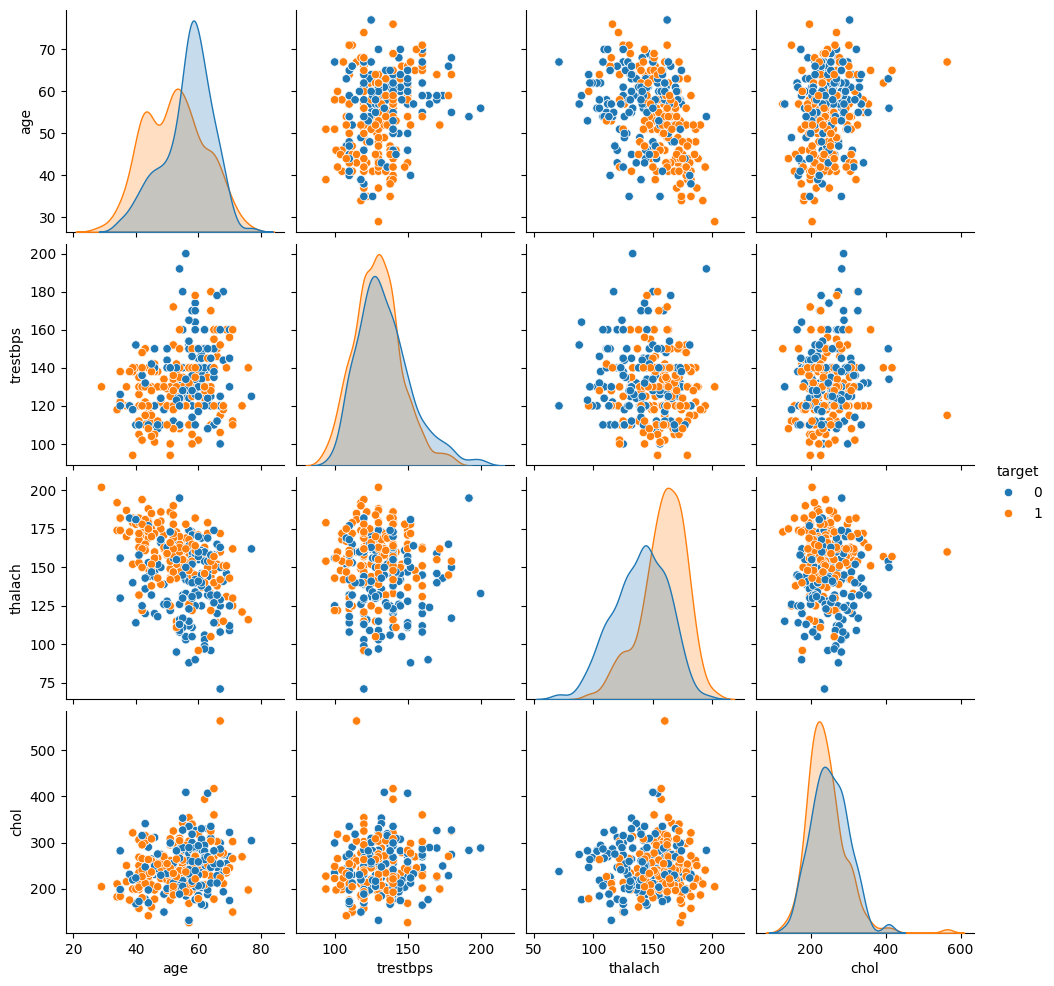

In [121]:
sns.pairplot(df[['age','trestbps','thalach','chol','target']], hue='target', size=2.5)

(14.5, -0.5)

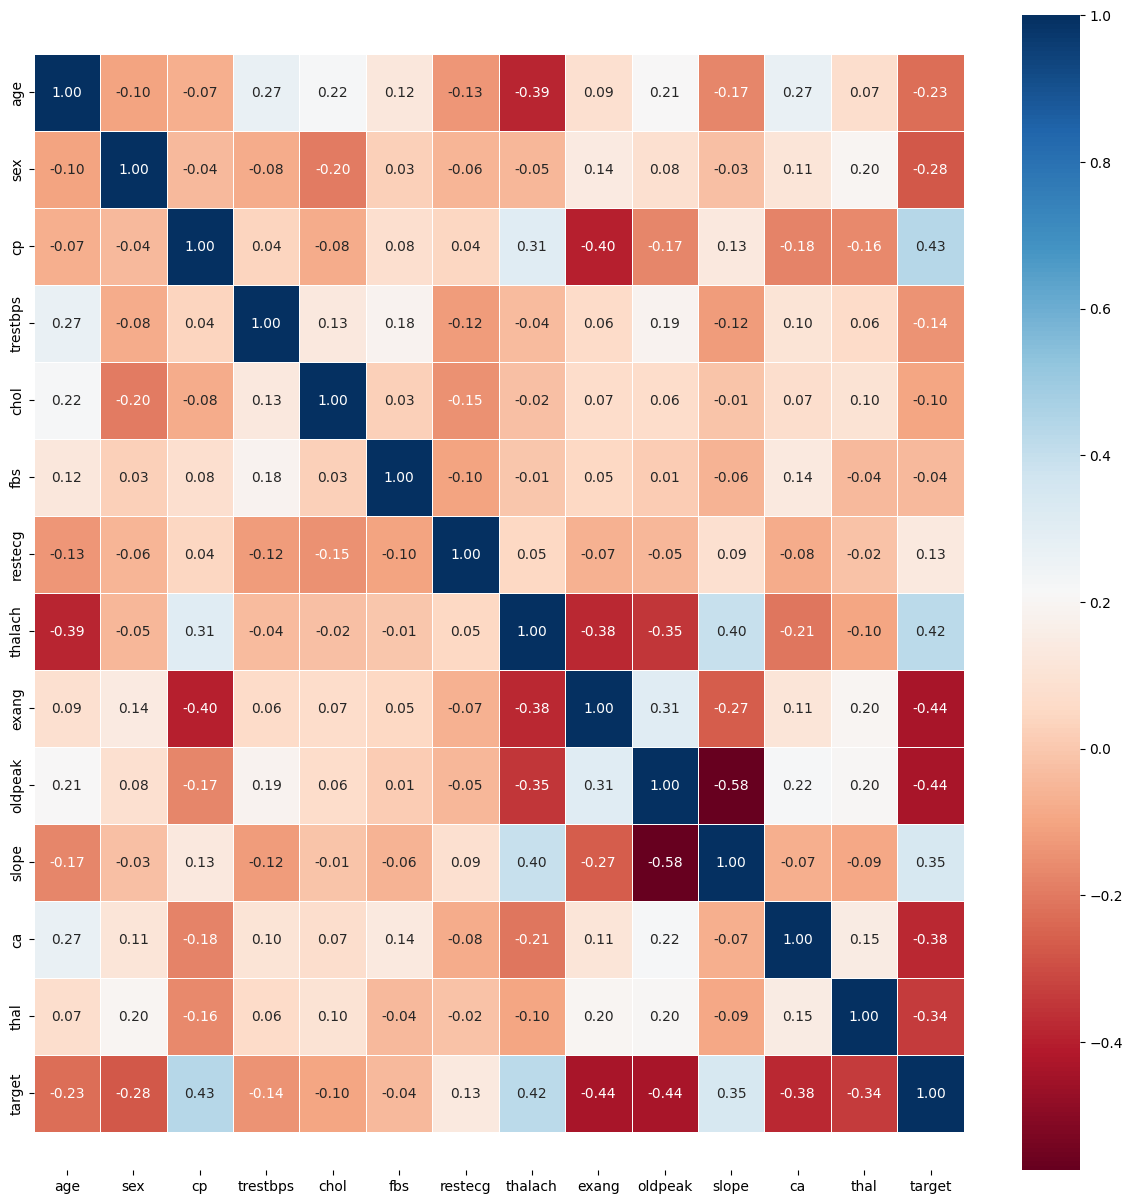

In [127]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [6]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [7]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [8]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''

    w = np.zeros(X.shape[1])
    lr = 1
    epochs = 10

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + lr * X[i]*Y[i]


    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [17]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here
    w = np.zeros(X.shape[1])
    lr = 1
    epochs = 100
    
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for i in range(X.shape[0]):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                total_error -= (np.dot(X[i], w)*Y[i])
                w = w + lr * X[i]*Y[i]
                 
        errors.append(total_error)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

In [18]:
from sklearn.preprocessing import StandardScaler

features = df.columns[:-1]
gaussian_feat = {'age': 0, 'trestbps': 3, 'chol': 4, 'thalach': 7, 'oldpeak': 9}

scaler = StandardScaler()

df_normalized = df.copy()
df_normalized[list(gaussian_feat.keys())] = scaler.fit_transform(df_normalized[list(gaussian_feat.keys())].to_numpy())
df_normalized.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [19]:
X = df_normalized[features].to_numpy()
y = df_normalized.loc[:, "target"].to_numpy()

In [20]:
y = np.where(y==0, -1, y)

In [21]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.ones((X.shape[0], 1)) * -1

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [22]:
X.shape, y.shape

((1025, 14), (1025,))

In [45]:
# TODO: Split the data to train and test with a 0.2 ratio
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=34)

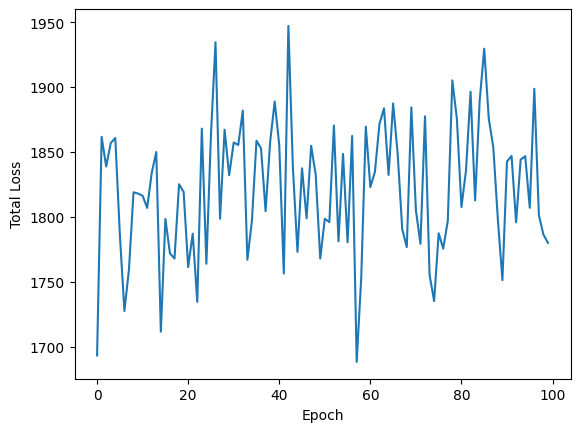

In [46]:
w = perceptron_sgd_plot(X_train, y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [47]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation
    return np.sum(y_true == y_pred, axis=0) / len(y_true)

Get the accuracy of your model using the function you implemented.

In [48]:
# TODO

def predict(X, w):
    output = np.dot(X, w) # (N, 1)
    pred = np.sign(output)
    return pred

predictions = predict(X_val, w)

print(accuracy_score(y_val, predictions))

0.8097560975609757


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [49]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    num = len(labels)
    predicted = np.array(predicted, dtype=np.int32)

    actual[actual==-1] = 0
    predicted[predicted==-1] = 0

    matrix = np.zeros((num, num), dtype=np.int64)

    # TODO: Populate the confusion matrix
    # print(actual.shape, predicted.shape)
    for label, pred in zip(actual, predicted):
        # print(label, pred)
        matrix[label, pred] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [50]:
def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt
    
    df_cm = pd.DataFrame(matrix, index=labels, columns=labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

Now plot the confusion matrix for your model:

[[70 32]
 [ 7 96]]


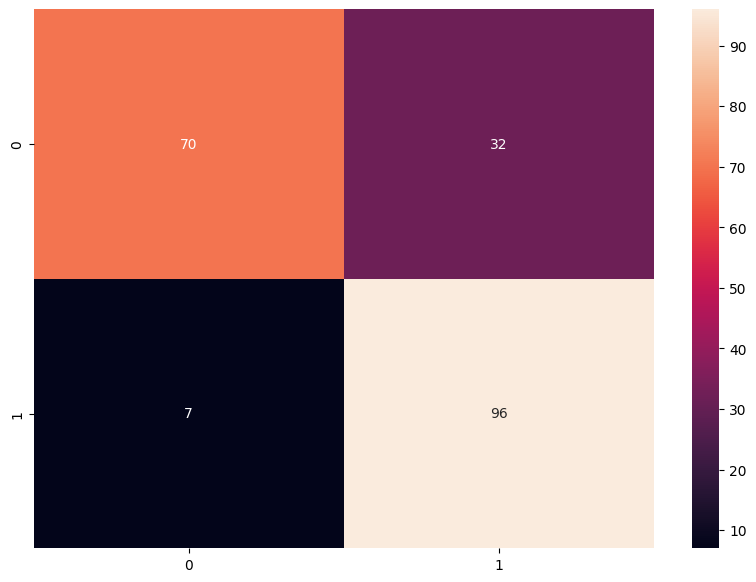

In [51]:
# TODO
cm = confusion_matrix(y_val, predictions, ['1', '0'])
print(cm)
plot_confusion_matrix(cm, ['0', '1'])

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [52]:
def recall_score(cm):
  #TODO: return the recall scor
  return cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(recall_score(cm))

0.9320388349514563


In [53]:
def precision_score(cm):
  #TODO: return the precision score
  return cm[1, 1] / (cm[0, 1] + cm[1, 1])

print(precision_score(cm))

0.75


In [54]:
def f1_score(cm):
  #TODO: return the f1 score
  recall = recall_score(cm)
  precision = precision_score(cm)
  return 2*precision*recall / (precision+recall)

print(f1_score(cm))

0.8311688311688312


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [55]:
# I took main idea of this from reference below and edited some sections. 
# https://github.com/remykarem/mixed-naive-bayes/blob/6d90de8adf75dbef032ad51029ad3782190ec577/mixed_naive_bayes/mixed_naive_bayes.py

class MixedDataNB:
    def __init__(self, categorical_features=None, alpha=0.5, var_smoothing=1e-9):
        self.alpha = alpha
        self.var_smoothing = var_smoothing
        self.num_features = 0
        self.epsilon = 1e-9
        self.categorical_features = categorical_features

        self.gaussian_features = []
        self.theta = []
        self.sigma = []
        self.categorical_posteriors = []

    def fit(self, X, y):

        self.alpha = 1
        self.epsilon = self.var_smoothing * np.var(X, ddof=1, axis=0).max()

        uniques = np.unique(y)
        num_classes = uniques.size
        (num_samples, self.num_features) = X.shape

        self.priors = np.bincount(y)/num_samples
        
        if self.categorical_features is None:
            self.categorical_features = []
        elif self.categorical_features == 'all':
            self.categorical_features = np.arange(0, self.num_features)

        self.categorical_features = np.array(
            self.categorical_features).astype(int)
        self.gaussian_features = np.delete(
            np.arange(self.num_features), self.categorical_features)

        # How many categories are there in each categorical_feature
        # Add 1 due to zero-indexing
        self.max_categories = np.max(
            X[:, self.categorical_features], axis=0) + 1
        self.max_categories = self.max_categories.astype(int)

        # Prepare empty arrays
        if self.gaussian_features.size != 0:
            self.theta = np.zeros((num_classes, len(self.gaussian_features)))
            self.sigma = np.zeros((num_classes, len(self.gaussian_features)))
        if self.categorical_features.size != 0:
            self.categorical_posteriors = [
                np.zeros((num_classes, num_categories))
                for num_categories in self.max_categories]

        # optimising
        for y_i in uniques:
            if self.gaussian_features.size != 0:
                x = X[y == y_i, :][:, self.gaussian_features]
                self.theta[y_i, :] = np.mean(x, axis=0)
                self.sigma[y_i, :] = np.var(x, axis=0)

            if self.categorical_features.size != 0:
                for i, categorical_feature in enumerate(self.categorical_features):
                    dist = np.bincount(X[y == y_i, :][:, categorical_feature].astype(int),
                                       minlength=self.max_categories[i]) + self.alpha
                    self.categorical_posteriors[i][y_i, :] = dist/np.sum(dist)

        return self


    def predict_proba(self, X_test):

        X_test = np.array(X_test)

        if self.gaussian_features.size != 0:
            x_gaussian = X_test[:, self.gaussian_features]
            mu = self.theta[:, np.newaxis]
            s = self.sigma[:, np.newaxis] + self.epsilon

            # (num_classes, num_samples, num_features)
            something = 1./np.sqrt(2.*np.pi*s) * \
                np.exp(-((x_gaussian-mu)**2.)/(2.*s))

            # (num_samples, num_classes)
            t = np.prod(something, axis=2)[:, :, np.newaxis]
            t = np.squeeze(t.T)

        if self.categorical_features.size != 0:
            X = X_test[:, self.categorical_features].astype(int)

            probas = [categorical_posterior[:, X[:, i][:, np.newaxis]]
                      for i, categorical_posterior
                      in enumerate(self.categorical_posteriors)]

            r = np.concatenate([probas], axis=0)
            r = np.squeeze(r, axis=-1)
            r = np.moveaxis(r, [0, 1, 2], [2, 0, 1])

            # (num_samples, num_classes)
            p = np.prod(r, axis=2).T

        if self.gaussian_features.size != 0 and self.categorical_features.size != 0:
            finals = t * p * self.priors
        elif self.gaussian_features.size != 0:
            finals = t * self.priors
        elif self.categorical_features.size != 0:
            finals = p * self.priors

        normalised = finals.T/(np.sum(finals, axis=1) + 1e-6)
        normalised = np.moveaxis(normalised, [0, 1], [1, 0])

        return normalised
    
    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1), np.max(probs, axis=1)

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [72]:
features = df.columns[:-1]
gaussian_feat = {'age': 0, 'trestbps': 3, 'chol': 4, 'thalach': 7, 'oldpeak': 9}
categorical_feat = {col: i for i, col in enumerate(features) if col not in gaussian_feat.keys()}

In [73]:
categorical_feat, gaussian_feat

({'sex': 1,
  'cp': 2,
  'fbs': 5,
  'restecg': 6,
  'exang': 8,
  'slope': 10,
  'ca': 11,
  'thal': 12},
 {'age': 0, 'trestbps': 3, 'chol': 4, 'thalach': 7, 'oldpeak': 9})

In [74]:
# TODO
X = df[features].to_numpy()
y = df.loc[:, "target"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training

In [75]:
# TODO
model = MixedDataNB(categorical_features=list(categorical_feat.values()))
model.fit(X_train, y_train)

### Make predictions

In [76]:
# TODO
predictions, probs = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [77]:
print(accuracy_score(y_val, predictions))

0.824390243902439


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

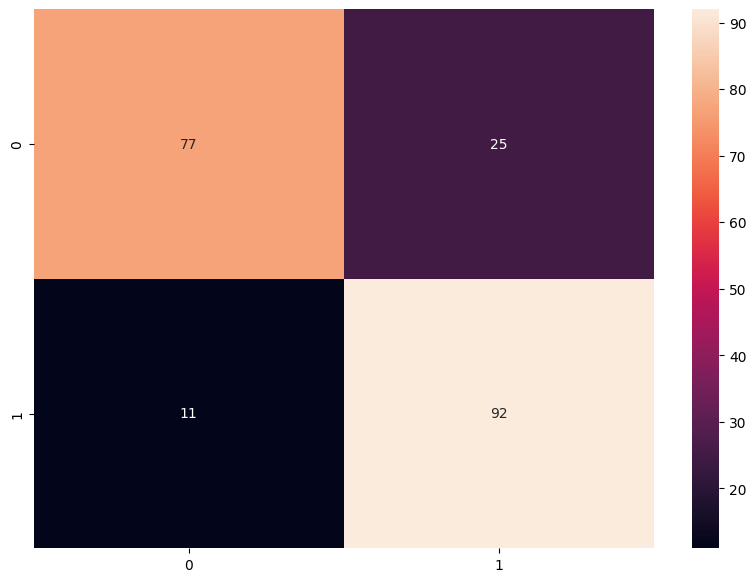

In [78]:
# TODO
cm = confusion_matrix(y_val, predictions, ['0', '1'])
plot_confusion_matrix(cm, ['0', '1'])

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [79]:
print(recall_score(cm))

0.8932038834951457


In [80]:
print(precision_score(cm))

0.7863247863247863


In [81]:
print(f1_score(cm))

0.8363636363636364


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.

In [82]:
sample = X_val[0].astype(np.float16)
sample[gaussian_feat['chol']]


209.0

In [83]:
chol_range = np.linspace(df['chol'].min(), df['chol'].max(), 15)
chol_range

array([126.        , 157.28571429, 188.57142857, 219.85714286,
       251.14285714, 282.42857143, 313.71428571, 345.        ,
       376.28571429, 407.57142857, 438.85714286, 470.14285714,
       501.42857143, 532.71428571, 564.        ])

In [84]:
oldpeak_range = np.linspace(df['oldpeak'].min(), df['oldpeak'].max(), 15)
oldpeak_range

array([0.        , 0.44285714, 0.88571429, 1.32857143, 1.77142857,
       2.21428571, 2.65714286, 3.1       , 3.54285714, 3.98571429,
       4.42857143, 4.87142857, 5.31428571, 5.75714286, 6.2       ])

In [85]:
# create mesh grid of chol and oldpeak features
samples = np.repeat(sample[np.newaxis, :], 15, axis=0)
samples[:, gaussian_feat['chol']] = chol_range
samples = np.repeat(samples[np.newaxis, :], 15, axis=0)
samples[:, :, gaussian_feat['oldpeak']] = np.repeat(oldpeak_range.reshape(-1, 1), 15, axis=1)

In [86]:
# calculate probablities of mesh grid with MixedData classifier
compare = np.zeros((15, 15, 2))
for i in range(sample.shape[0]):
    probs = model.predict_proba(samples[i])
    compare[i] = probs

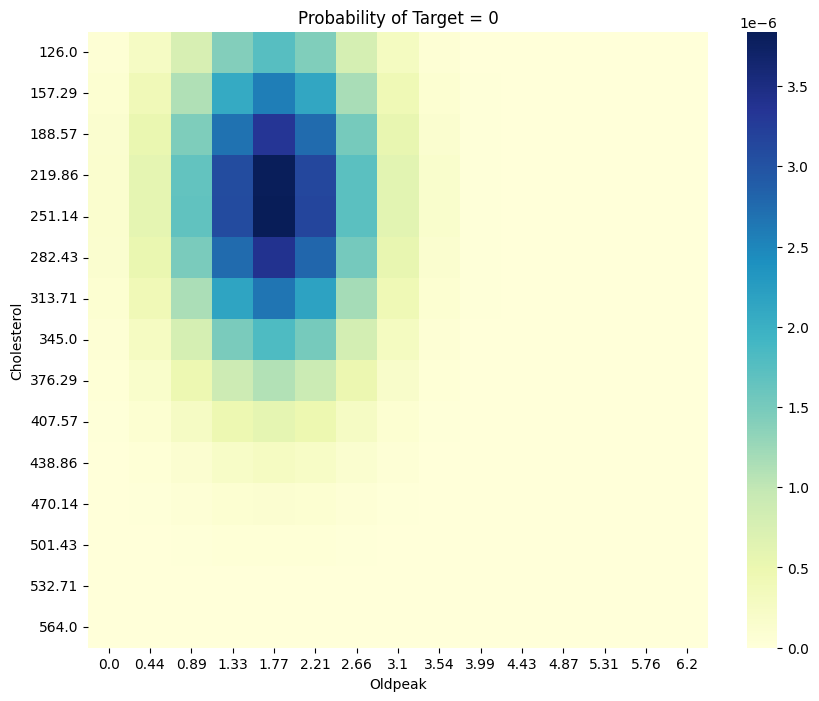

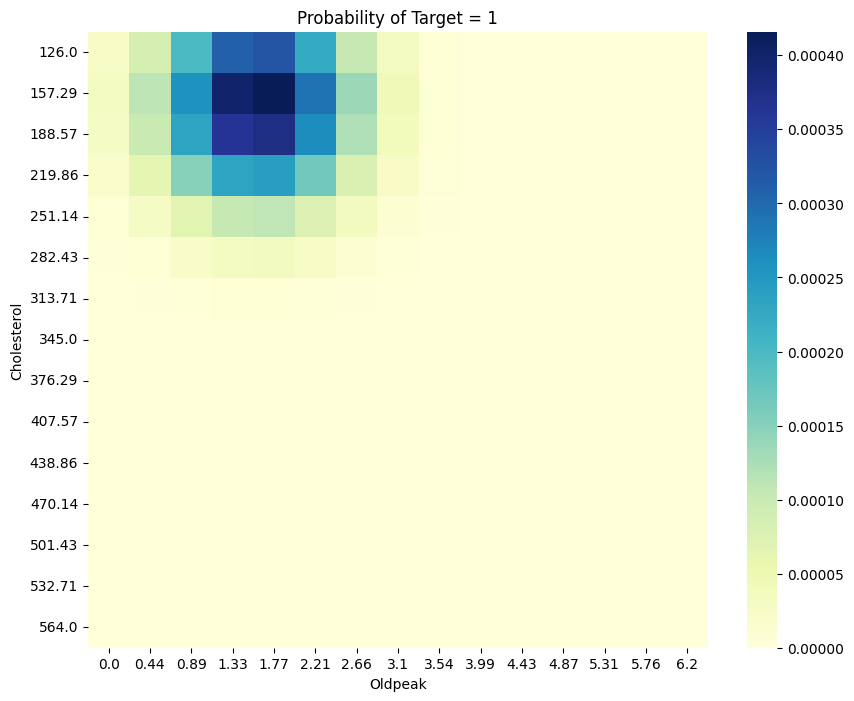

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(compare[:, :, 0], cmap="YlGnBu", xticklabels=np.around(oldpeak_range, decimals=2),
            yticklabels=np.around(chol_range, decimals=2))
plt.xlabel('Oldpeak')
plt.ylabel('Cholesterol')
plt.title('Probability of Target = 0')
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(compare[:, :, 1], cmap="YlGnBu", xticklabels=np.around(oldpeak_range, decimals=2),
            yticklabels=np.around(chol_range, decimals=2))
plt.xlabel('Oldpeak')
plt.ylabel('Cholesterol')
plt.title('Probability of Target = 1')
plt.show()

In [104]:
arr = np.concatenate((X_val[:, gaussian_feat['chol'], np.newaxis], X_val[:, gaussian_feat['oldpeak'], np.newaxis]), axis=1)
# print(arr)
probas = model.predict_proba(X_val)
arr = np.concatenate((arr, probas), axis=1)
print(arr.shape)
# print(arr)

(205, 4)


<Axes: >

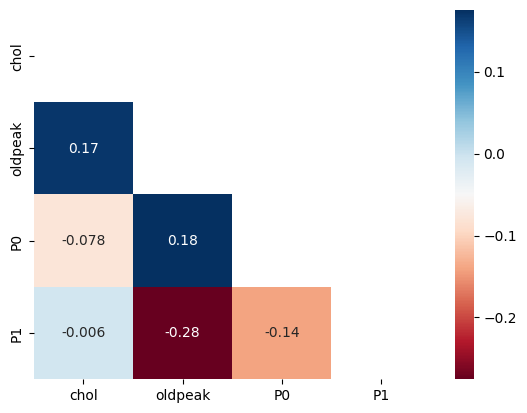

In [125]:
df_c = pd.DataFrame(arr,
             columns=['chol', 'oldpeak', 'P0', 'P1'])
corr = df_c.corr()
mask = np.triu(np.ones_like(df_c.corr(), dtype=bool))
sns.heatmap(corr, mask = mask, cmap='RdBu', annot=True)

The 'oldpeak' feature is more useful than 'chol' because its correlation with both classes (P0 and P1) is greater than the correlation of the 'chol' feature with them.

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [353]:
# TODO
features = list(df.columns[:-1])
features.remove('chol')
gaussian_feat = {'age': 0, 'trestbps': 3, 'thalach': 7, 'oldpeak': 9}
categorical_feat = {col: i for i, col in enumerate(features) if col not in gaussian_feat.keys()}

X = df[features].to_numpy()
y = df.loc[:, "target"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = MixedDataNB(categorical_features=list(categorical_feat.values()))
model.fit(X_train, y_train)
predictions, probs = model.predict(X_val)

print('acc: ', accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions, ['0', '1'])
print('recall: ', recall_score(cm))
print('precision: ', precision_score(cm))
print('f1: ', f1_score(cm))

0.824390243902439
0.8932038834951457
0.7863247863247863
0.8363636363636364


Remove oldpeak and test model

In [354]:
# TODO
features = list(df.columns[:-1])
features.remove('oldpeak')
gaussian_feat = {'age': 0, 'trestbps': 3, 'chol': 4, 'thalach': 7}
categorical_feat = {col: i for i, col in enumerate(features) if col not in gaussian_feat.keys()}

X = df[features].to_numpy()
y = df.loc[:, "target"].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = MixedDataNB(categorical_features=list(categorical_feat.values()))
model.fit(X_train, y_train)
predictions, probs = model.predict(X_val)

print('acc: ', accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions, ['0', '1'])
print('recall: ', recall_score(cm))
print('precision: ', precision_score(cm))
print('f1: ', f1_score(cm))

0.824390243902439
0.8737864077669902
0.7964601769911505
0.8333333333333334


Comparison

**Answer:**

when we remove chol feature, f1 score remains same. But when remove oldpeak feature, f1 score drops a little.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

The Naive Bayes model generally performed better than perceptron based on f1 score. Additionally, result of perceptron was very noisy and related to data splitting.

There are some reasons for this:
1. Existence of high dimensionality feature might make the perceptron more susceptible to noise in the data and overfitting.
2. Naive Bayes, being a probabilistic model, might be less affected by different data splits. But perceptron might be sensitive to how the data is split into training and testing sets.
3. Naive Bayes assumes that features are conditionally independent given the class label. If this assumption exists in dataset, Naive Bayes can perform remarkably well.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [3]:
df = pd.read_csv("Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

target
0    499
1    226
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

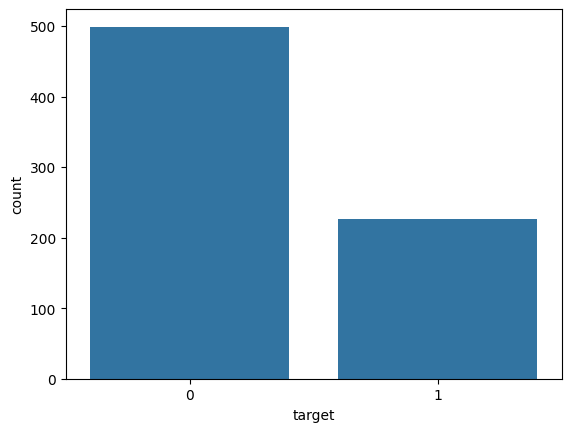

In [17]:
# TODO
print(df['target'].value_counts())
sns.countplot(x="target", data=df)

### Split data

In [39]:
# TODO

def data_split(dataframe):
    features = dataframe.columns[:-1]

    X = dataframe[features].to_numpy()
    y = dataframe.loc[:, "target"].to_numpy()

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = data_split(df)

### Train model and make predictions

In [40]:
# TODO
def createNBmodelandPrediction(dataframe, X_train, y_train, X_val):
    features = dataframe.columns[:-1]
    gaussian_feat = {'age': 0, 'trestbps': 3, 'chol': 4, 'thalach': 7, 'oldpeak': 9}
    categorical_feat = {col: i for i, col in enumerate(features) if col not in gaussian_feat.keys()}

    model = MixedDataNB(categorical_features=list(categorical_feat.values()))
    model.fit(X_train, y_train)

    return model.predict(X_val)

predictions, probs = createNBmodelandPrediction(df, X_train, y_train, X_val)

print(accuracy_score(y_val, predictions))

0.8137931034482758


### Plot confusion matrix

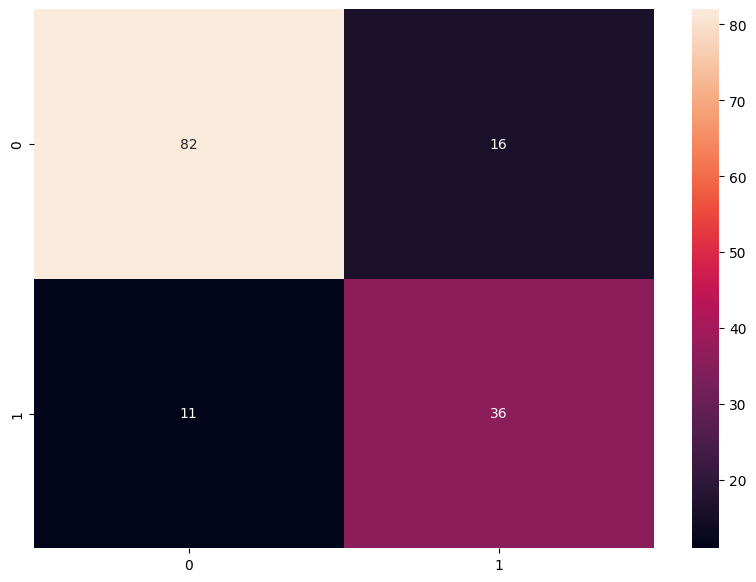

In [41]:
# TODO
cm = confusion_matrix(y_val, predictions, ['0', '1'])
plot_confusion_matrix(cm, ['0', '1'])

### Calculate metrics

In [42]:
# TODO
print(recall_score(cm))
print(precision_score(cm))
print(f1_score(cm))

0.7659574468085106
0.6923076923076923
0.7272727272727273


## Second dataset

### Load data

In [44]:
df = pd.read_csv("Imbalanced_Datasets/2.csv")

### Find the distribution


Find the number of samples from each target label.

target
0    499
1    126
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

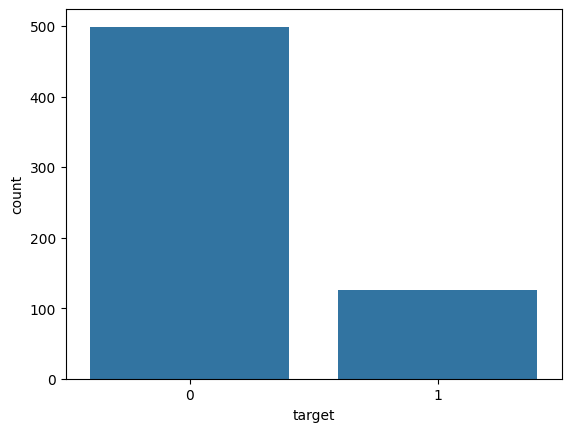

In [45]:
# TODO
print(df['target'].value_counts())
sns.countplot(x="target", data=df)

### Split data

In [46]:
# TODO
X_train, X_val, y_train, y_val = data_split(df)

### Train model and make predictions

In [47]:
# TODO
predictions, probs = createNBmodelandPrediction(df, X_train, y_train, X_val)

print(accuracy_score(y_val, predictions))

0.872


### Plot confusion matrix

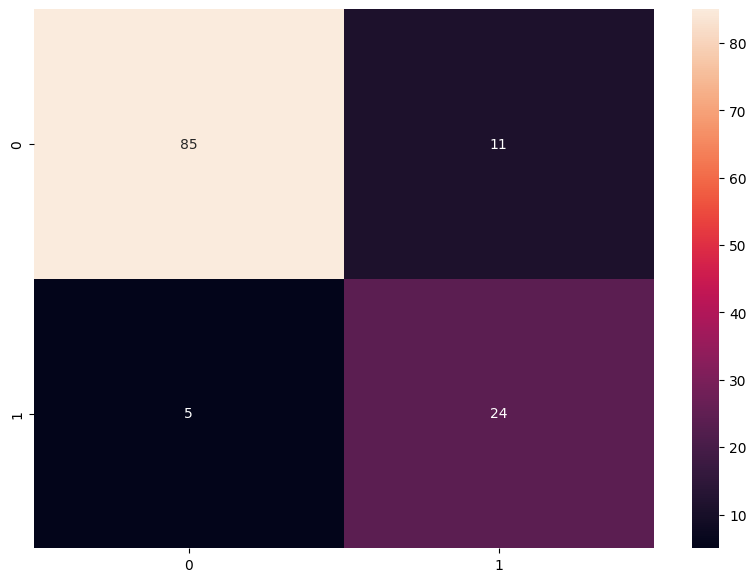

In [48]:
# TODO
cm = confusion_matrix(y_val, predictions, ['0', '1'])
plot_confusion_matrix(cm, ['0', '1'])

### Calculate metrics

In [49]:
# TODO
print(recall_score(cm))
print(precision_score(cm))
print(f1_score(cm))

0.8275862068965517
0.6857142857142857
0.75


## Third dataset

### Load data

In [50]:
df = pd.read_csv("Imbalanced_Datasets/3.csv")

### Find the distribution


Find the number of samples from each target label.

target
0    499
1     26
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

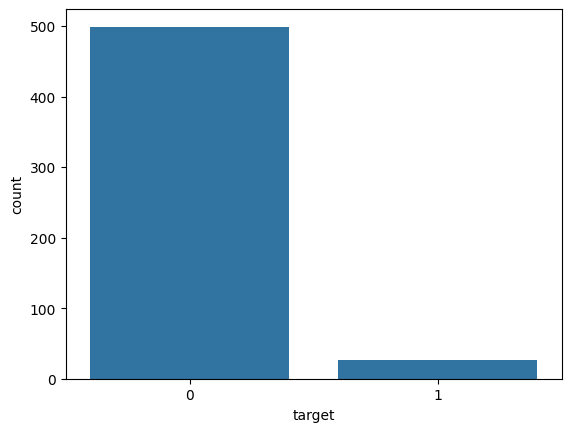

In [51]:
# TODO
print(df['target'].value_counts())
sns.countplot(x="target", data=df)

### Split data

In [52]:
# TODO
X_train, X_val, y_train, y_val = data_split(df)

### Train model and make predictions

In [53]:
# TODO
predictions, probs = createNBmodelandPrediction(df, X_train, y_train, X_val)

print(accuracy_score(y_val, predictions))

0.9142857142857143


### Plot confusion matrix

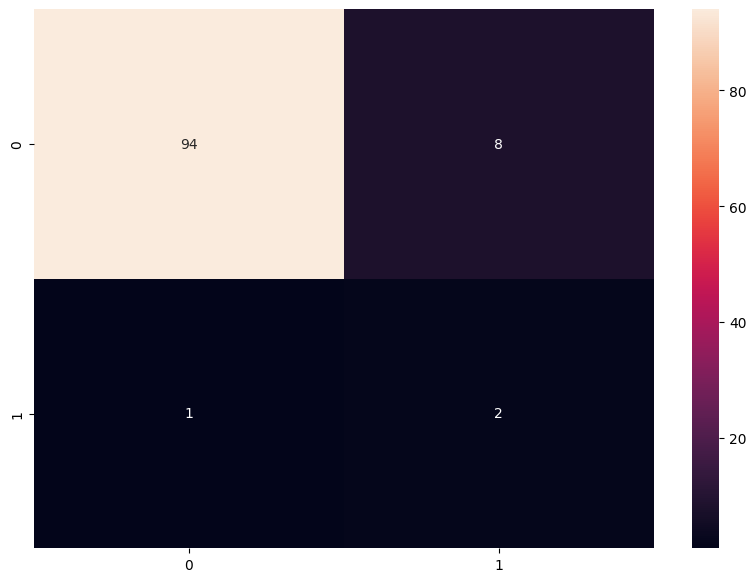

In [54]:
# TODO
cm = confusion_matrix(y_val, predictions, ['0', '1'])
plot_confusion_matrix(cm, ['0', '1'])

### Calculate metrics

In [55]:
# TODO
print(recall_score(cm))
print(precision_score(cm))
print(f1_score(cm))

0.6666666666666666
0.2
0.30769230769230765


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**

The F1 score is a better metric. In some cases where there are only a few samples for a class, the model may misclassify all samples of that class, yet the accuracy remains high.